In [1]:

import _init_
from constants import * 
from set_path import *
from config import *
from functions import *

In [4]:
# folder = 'Summit/AddMassExtDir/Test/'
folder = 'Summit/AddMassExtDir/CleanTest/'
# folder = 'Summit/AddMassExtDir/Zbg0.2/'
# folder = 'Summit/Testec51dd8/'
# folder = 'Summit/NoMass/'
# folder = 'Summit/AddMassExtDir/TwoCell/'
# folder = 'Summit/MetDepCooling/RemoveTFloor/'
# folder = 'Summit/MetDepCooling/Zbg0.2RemoveTfloor/'
# folder = 'Summit/GasGravity/RemoveTFloor/'
folder = 'Summit/GasGravity/Fiducial/'
# folder  = 'sims/CheckPR667/'

In [5]:
hdf5_folder = os.path.join(h5_path, folder, 'PhaseOutflowRates/')
infile   = os.path.join(hdf5_folder, 'metal_uniform.in')
dom_min, dom_max, ncells = getdomain(infile)
fac = 1
zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

In [6]:
os.chdir(hdf5_folder)
list_file = glob.glob("*.h5")

In [7]:
timestep = np.zeros(len(list_file))
tot_mass_flux = np.zeros((len(list_file), zrange.shape[0]))
warm_mass_flux = np.zeros((len(list_file), zrange.shape[0]))
hot_mass_flux = np.zeros((len(list_file), zrange.shape[0]))
for i in range(len(list_file)):
    hf = h5py.File(list_file[i] ,'r')
    timestep[i] = np.array(hf.get("Timestep")) 
    tot_mass_flux[i] = np.array(hf.get("TotalOutflowRate"))
    warm_mass_flux[i] = np.array(hf.get("WarmOutflowRate"))
    hot_mass_flux[i] = np.array(hf.get("HotOutflowRate"))

(0.0, 200.0)

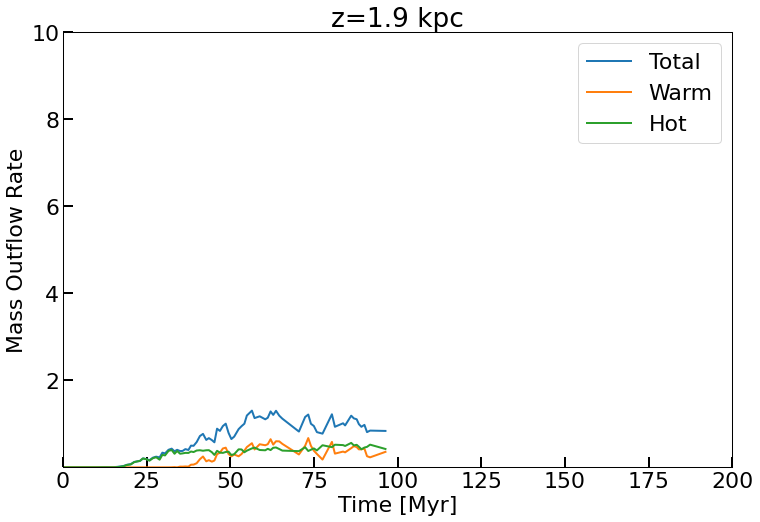

In [9]:

fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))
# ax.plot(timestep, tot_mass_flux[:,-1], 'o')
munit = yr_to_sec/Msun/1.e-2
index = 750
listarr = [tot_mass_flux[:,index], warm_mass_flux[:,index], hot_mass_flux[:,index]]
label = ['Total', 'Warm', 'Hot']
i = 0
for arr in listarr:
    tt = timestep 
    indexes = list(range(len(tt)))
    indexes.sort(key=tt.__getitem__)
    sorted_time = list(map(tt.__getitem__, indexes))
    sorted_mdot  = list(map(arr.__getitem__, indexes))
    ax.plot(sorted_time, np.abs(sorted_mdot)*munit, '-', label=label[i],markersize=12, lw=2.)
    i+=1


ax.legend()
ax.set_title('z=%.1f'%(zrange[index]/kpc) + ' kpc')
# ax.set_yscale('log')
ax.set_ylim(1.e-3,1.e1)
ax.set_ylabel("Mass Outflow Rate")
ax.set_xlabel('Time [Myr]')
ax.set_xlim(0.0,200.)

In [107]:
time_mask = (timestep>100.)
tot_mass_flux_avg = np.average(tot_mass_flux[time_mask], axis=0)
warm_mass_flux_avg = np.average(warm_mass_flux[time_mask], axis=0)
hot_mass_flux_avg = np.average(hot_mass_flux[time_mask], axis=0)

Text(0.5, 0, 'z [kpc]')

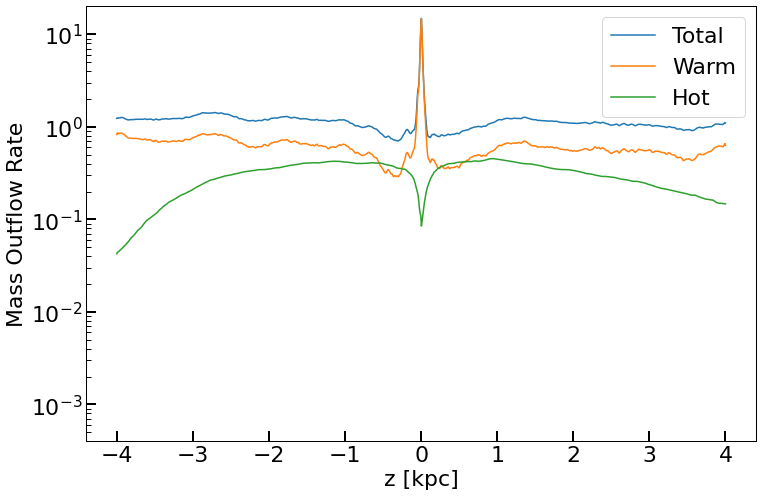

In [108]:

fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(12, 8))
# ax.plot(timestep, tot_mass_flux[:,-1], 'o')
munit = yr_to_sec/Msun/1.e-2
index = 400
listarr = [tot_mass_flux_avg, warm_mass_flux_avg, hot_mass_flux_avg]
label = ['Total', 'Warm', 'Hot']
i = 0
for arr in listarr:
    ax.plot(zrange/kpc,np.asarray(np.abs(arr))*munit, '-', label=label[i],  markersize=12)
    i+=1


ax.legend()
ax.set_yscale('log')
ax.set_ylim(4.e-4, 20.)
ax.set_ylabel("Mass Outflow Rate")
ax.set_xlabel('z [kpc]')
# ax.set_xlim(0.1,4.)

yt : [INFO     ] 2024-10-11 14:42:51,144 Parameters: current_time              = 5323980326262278.0
yt : [INFO     ] 2024-10-11 14:42:51,146 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-11 14:42:51,147 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-11 14:42:51,149 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SummitData/GasGravity/Production2pc/R4/


yt : [INFO     ] 2024-10-11 14:42:52,195 Parameters: current_time              = 3357591845060962.5
yt : [INFO     ] 2024-10-11 14:42:52,197 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-11 14:42:52,198 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-11 14:42:52,200 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-10-11 14:42:53,299 Parameters: current_time              = 1205681332723408.8
yt : [INFO     ] 2024-10-11 14:42:53,301 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-11 14:42:53,302 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-11 14:42:53,304 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-10-11 14:42:54,405 Parameters: current_time              = 642008765513454.6
yt : [INFO     ] 2024-10-11 14:42:5

0.008900022978590971
/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SummitData/GasGravity/Production2pc/R8/


yt : [INFO     ] 2024-10-11 14:43:12,655 Parameters: current_time              = 2634079600922115.0
yt : [INFO     ] 2024-10-11 14:43:12,656 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-11 14:43:12,657 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-11 14:43:12,659 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-10-11 14:43:13,708 Parameters: current_time              = 3771755976374022.5
yt : [INFO     ] 2024-10-11 14:43:13,710 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-11 14:43:13,711 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-11 14:43:13,712 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]
yt : [INFO     ] 2024-10-11 14:43:14,676 Parameters: current_time              = 1602908950600369.2
yt : [INFO     ] 2024-10-11 14:43:

yt : [INFO     ] 2024-10-11 14:43:31,457 Parameters: current_time              = 1795999122825389.0
yt : [INFO     ] 2024-10-11 14:43:31,459 Parameters: domain_dimensions         = [ 512    1 4096]
yt : [INFO     ] 2024-10-11 14:43:31,460 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -1.2072e+22]
yt : [INFO     ] 2024-10-11 14:43:31,461 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 1.2072e+22]


0.007874056787343807
/scratch/jh2/av5889/sims/SetonixRuns/R16/4pc/Redo/


yt : [INFO     ] 2024-10-11 14:43:32,938 Parameters: current_time              = 5159277915935167.0
yt : [INFO     ] 2024-10-11 14:43:32,939 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-10-11 14:43:32,941 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-10-11 14:43:32,942 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]
yt : [INFO     ] 2024-10-11 14:43:33,563 Parameters: current_time              = 2972897209013445.5
yt : [INFO     ] 2024-10-11 14:43:33,565 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-10-11 14:43:33,566 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-10-11 14:43:33,568 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]
yt : [INFO     ] 2024-10-11 14:43:34,186 Parameters: current_time              = 8428175682909402.0
yt : [INFO     ] 2024-10-11 14:43:

yt : [INFO     ] 2024-10-11 14:43:45,610 Parameters: current_time              = 5869917531647079.0
yt : [INFO     ] 2024-10-11 14:43:45,612 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-10-11 14:43:45,613 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-10-11 14:43:45,615 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


0.0006227901789303948
Created file-- /g/data/jh2/av5889/quokka_myrepo/Analysis/figures/Paper/mass_outflow.jpeg


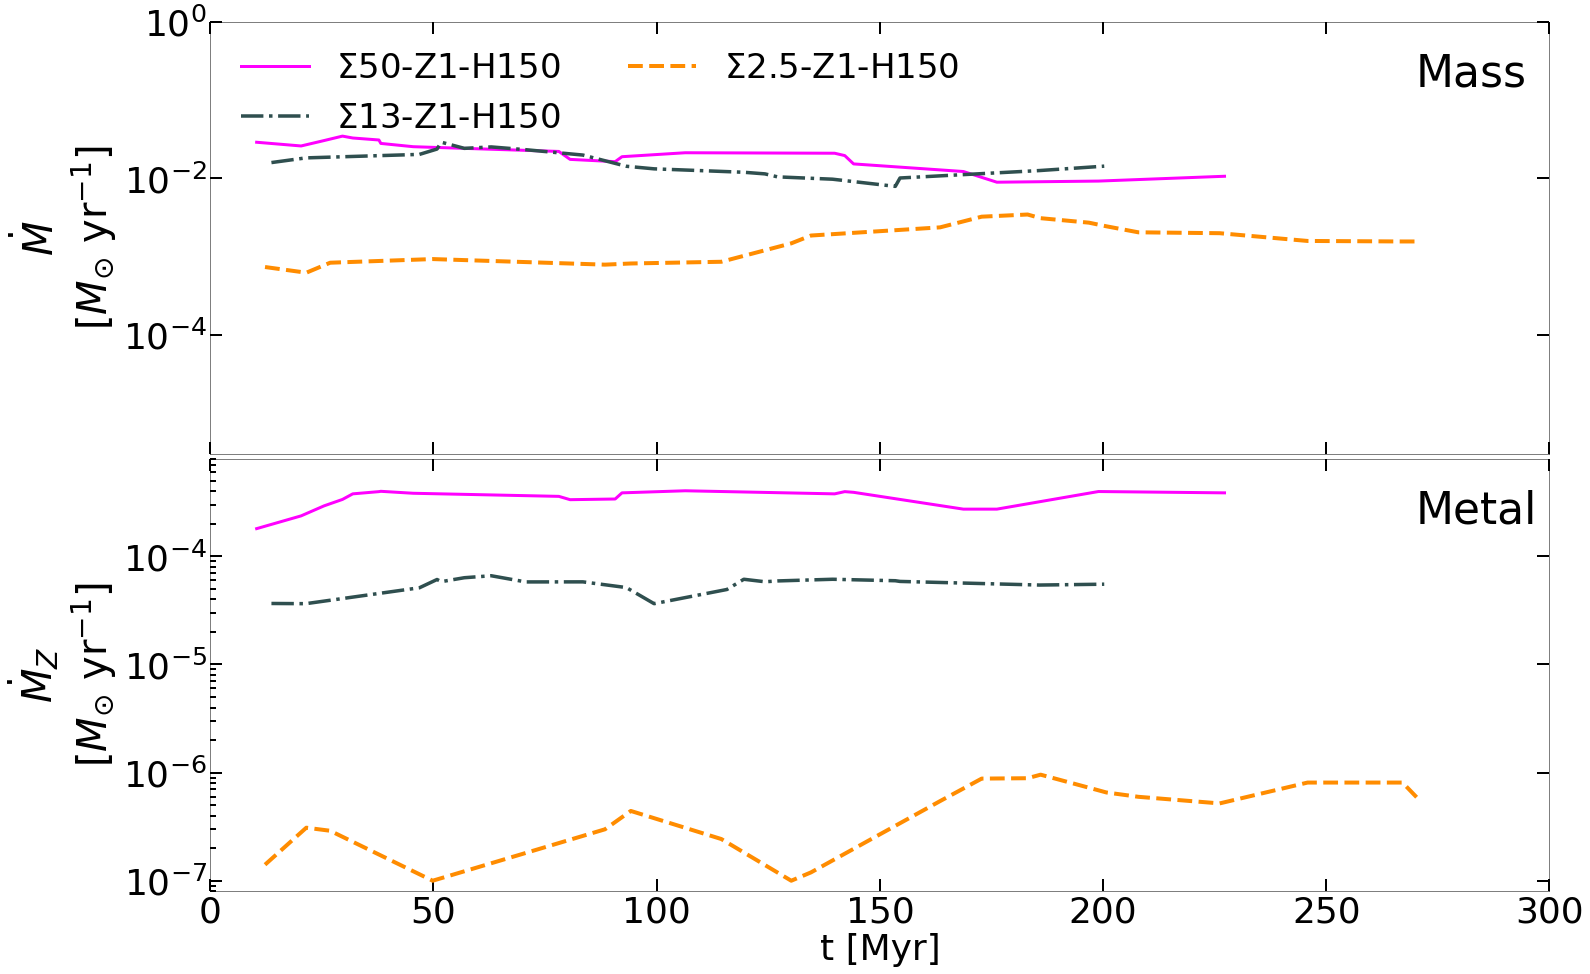

In [2]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *
import seaborn as sns
from scipy.ndimage import uniform_filter1d


plt.rcParams['font.size']=36
plt.rcParams['axes.linewidth']=0.5
plt.rcParams['xtick.major.size']=12
plt.rcParams['xtick.minor.size']=1
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.width']=2.
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=12
plt.rcParams['ytick.minor.size']=6
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=2
plt.rcParams['ytick.direction']='in'


# folder_list = ['SummitData/GasGravity/Production2pc/R4-0.2Zsol/',  \
            #    'SummitData/GasGravity/Production2pc/R8-0.2Zsol/',\
            #   'SetonixRuns/R16-0.2Zsol/4pc/Redo/']
# label1 =[r'$\Sigma50$-Z$0.2$-H$150$', r'$\Sigma13$-Z$0.2$-H$150$',  r'$\Sigma2.5$-Z$0.2$-H$150$']

folder_list = ['SummitData/GasGravity/Production2pc/R4/',  \
               'SummitData/GasGravity/Production2pc/R8/',\
              'SetonixRuns/R16/4pc/Redo/']
label = [r'$\Sigma50$-Z$1$-H$150$', r'$\Sigma13$-Z$1$-H$150$', r'$\Sigma2.5$-Z$1$-H$150$']
# label2 =['', '', r'$\Sigma2.5$-Z$0.2$-H$150$']


sigma_sfr = [ 0.000398107/yr_to_sec,\
               6.e-5/yr_to_sec ,\
               1.58e-6/yr_to_sec]
kk= 0
color =sns.color_palette("cool",n_colors=3) 
color = ['magenta', 'darkslategrey', 'darkorange']

fig, ax = plt.subplots(2, 1, gridspec_kw = {'wspace':0.01, 'hspace':0.01},figsize=(24, 16))

Zunit = Msun/1.e3

ls = ['-', '-.', '--']
lw = 3.0

for folder in folder_list:
    data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder)
    if(kk==2):    data_path = os.path.join('/scratch/jh2/av5889/sims/', folder)
    print(data_path)
    
    os.chdir(data_path)
    list_file1 = glob.glob("proj_y_plt*")
    list_file = list_file1[50:70]
    infile   = os.path.join(data_path, 'metal_uniform.in')

    dom_min, dom_max, ncells = getdomain(infile)
    fac = 1
    zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
    xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
    yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))

    height = np.amax(zrange)/2.
    
    dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
    dy = (dom_max[1]- dom_min[1])/(fac*int(ncells[1]))
    dz = (dom_max[2]- dom_min[2])/(fac*int(ncells[2]))
    
    timestep = np.zeros(len(list_file))
    scalar_flux_xz = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))
    tot_mass_flux_xz  = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))
    tot_mass_flux  = np.zeros((len(list_file), xrange.shape[0], zrange.shape[0]))

    i=0
    for f in list_file:
        inputfile = os.path.join(data_path, f)
    
        file_size = get_folder_size(inputfile) / (1024 * 1024)
        
        if(file_size<1.):
            print('Skipping ', inputfile, '\n')
            continue
            
        ds   = yt.load(inputfile)
        data = ds.covering_grid(level=0, left_edge=dom_min, dims=ds.domain_dimensions)
        
        timestep[i] = ds.current_time.to('Myr')
        tot_mass_flux_xz[i,:] = np.array(data['mass_outflow'])[:,0,:]*dx*yr_to_sec/Msun #/1.e-2
        tot_mass_flux[i,:] = np.array(data['mass_outflow'])[:,0,:]*dx
        scalar_flux_xz[i,:] = (np.array(data['scalar_outflow'])[:,0,:])*Zunit*dx*yr_to_sec/Msun #/1.e-4
        
        i+=1  
        
        
    sign = zrange/np.abs(zrange)
    
    height = np.amax(zrange)/2.
    index = min(range(zrange.shape[0]), key=lambda i: abs(zrange[i] - height))
    
    mass_flux_z = np.sum(tot_mass_flux, axis=1)*sign
    
    mask1 = (np.abs(zrange)) < (height + 2*dz)
    mask2 = (np.abs(zrange)) > ( height - 2.*dz)
    mask = mask1*mask2
    
    scalar_flux_z = np.sum(scalar_flux_xz , axis=1)*sign
    scalar_fluxz_avg   = scalar_flux_z + scalar_flux_z[::-1]
    scalar_flux = scalar_fluxz_avg[:, index]
    
    mass_flux_z = np.sum(tot_mass_flux_xz, axis=1)*sign

    mass_flux_z_avg =  (mass_flux_z +  mass_flux_z[::-1])
    mass_flux   = mass_flux_z_avg[:,index]
    
    indexes = list(range(len(timestep)))
    indexes.sort(key=timestep.__getitem__)
    sorted_time = np.asarray(list(map(timestep.__getitem__, indexes)))
    
    
    sorted_scalar_flux  = list(map(scalar_flux.__getitem__, indexes))
    sorted_mass_flux  = list(map(mass_flux.__getitem__, indexes))

    window_size = 5
    smoothed_array = uniform_filter1d(sorted_mass_flux, size=5)
    print(np.amin(smoothed_array))
    ax[0].plot(sorted_time, smoothed_array, color=color[kk], lw=lw, ls =ls[kk], label=label[kk])

    smoothed_array = uniform_filter1d(sorted_scalar_flux, size=2)
    
    smoothed_array[smoothed_array<0.0] = np.NAN
    ax[1].plot(sorted_time,  smoothed_array, color=color[kk], lw=lw, ls =ls[kk], label=label[kk])
    lw += 0.5
    kk+=1

ax[0].legend(frameon=False, ncol=2, fontsize=34, loc='upper left')
ax[0].set_ylabel(r'$\dot{M}$' + '\n' + r'$[M_{\odot}$ yr$^{-1}]$', fontsize =40)
ax[0].tick_params(axis='y',  right=True, left=True)
ax[0].tick_params(axis='x',  top=True, bottom=True, labelbottom=False)
ax[0].set_ylim(3.e-6, 1.)
ax[1].text(0.9, 0.85, 'Mass', transform=ax[0].transAxes, fontsize=44)

ax[1].set_ylabel(r'$\dot{M}_Z$' + '\n' + r'$[M_{\odot}$ yr$^{-1}]$', fontsize =40)
ax[1].tick_params(axis='x',  top=True, bottom=True)
ax[1].tick_params(axis='y',  left=True, right=True)
ax[1].set_ylim(8.e-8, 8.e-4)
ax[1].text(0.9, 0.85, 'Metal', transform=ax[1].transAxes, fontsize=44)

plt.setp(ax, 'yscale', 'log')
plt.setp(ax, 'xlim', (0.0, 300.))

plt.setp(ax[1], 'xlabel', 't [Myr]')
filename = fig_path + '/Paper/mass_outflow.jpeg'
# plt.savefig(filename, bbox_inches='tight', dpi=160)
print('Created file--', filename)
